**Developed by:** [Georgii Bocharov](https://github.com/georgebv)

**E-Mail:** bocharovgeorgii@gmail.com

**coastlib:** https://github.com/georgebv/coastlib

**License:** GNU General Public License v3.0


# Introduction
This notebook provides examples for the `noaa_ncei` module of the [coastlib](https://github.com/georgebv/coastlib) library. Source code for this module [can be found here](https://github.com/georgebv/coastlib/blob/master/coastlib/data/noaa_ncei.py).

The `noaa_ncei` module is a part of the `coastlib.data` package. This module provides interface to the [NOAA NCEI](https://www.ncei.noaa.gov/) data portal via the [NCEI Data Service API](https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation). It allows retrieval of environmental data collected by NOAA NCEI sensors such as wind, precipitation, air pressure, etc. in the form of [pandas](https://pandas.pydata.org/) [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). With the help of this tool one can automate extraction of large amounts of data from NOAA NCEI stations for further processing and storing.

# Basic Usage
Let's start by extracting hourly wind speed data for the La Guardia and Bethel Airport stations for the October 2012 time period:

In [1]:
%matplotlib inline

import pandas as pd
from coastlib.data import ncei_api, ncei_api_batch, ncei_datasets, ncei_search


df = ncei_api(
    dataset='local-climatological-data', stations=['72503014732', '70219026615'],
    start_date='2012-10-01', end_date='2012-11-01', datatypes=['HourlyWindSpeed', 'HourlyWindDirection']
)
df

REPORT_TYPE  \
STATION                                 DATE                              
72503014732 : LA GUARDIA AIRPORT, NY US 2012-10-01 00:51:00       FM-15   
                                        2012-10-01 01:00:00       FM-12   
                                        2012-10-01 01:51:00       FM-15   
                                        2012-10-01 02:51:00       FM-15   
                                        2012-10-01 03:51:00       FM-15   
...                                                                 ...   
70219026615 : BETHEL AIRPORT, AK US     2012-11-01 21:00:00       FM-12   
                                        2012-11-01 21:53:00       FM-15   
                                        2012-11-01 22:53:00       FM-15   
                                        2012-11-01 23:53:00       FM-15   
                                        2012-11-01 23:59:00       SOD     

                                                            HourlyWindDirection  \
STATION                                 DATE                                      
72503014732 : LA GUARDIA AIRPORT, NY US 2012-10-01 00:51:00                 270   
                                        2012-10-01 01:00:00                 270   
                                        2012-10-01 01:51:00                 290   
                                        2012-10-01 02:51:00                 260   
                                        2012-10-01 03:51:00                 250   
...                                                                         ...   
70219026615 : BETHEL AIRPORT, AK US     2012-11-01 21:00:00                 010   
                                        2012-11-01 21:53:00                 010   
                                        2012-11-01 22:53:00                 010   
                                        2012-11-01 23:53:00                 010   
                                        2012-11-01 23:59:00                 NaN   

                                                             LONGITUDE  \
STATION                                 DATE                             
72503014732 : LA GUARDIA AIRPORT, NY US 2012-10-01 00:51:00     -73.88   
                                        2012-10-01 01:00:00     -73.88   
                                        2012-10-01 01:51:00     -73.88   
                                        2012-10-01 02:51:00     -73.88   
                                        2012-10-01 03:51:00     -73.88   
...                                                                ...   
70219026615 : BETHEL AIRPORT, AK US     2012-11-01 21:00:00  -161.8293   
                                        2012-11-01 21:53:00  -161.8293   
                                        2012-11-01 22:53:00  -161.8293   
                                        2012-11-01 23:53:00  -161.8293   
                                        2012-11-01 23:59:00  -161.8293   

                                                            ELEVATION SOURCE  \
STATION                                 DATE                                   
72503014732 : LA GUARDIA AIRPORT, NY US 2012-10-01 00:51:00       3.4      7   
                                        2012-10-01 01:00:00       3.4      4   
                                        2012-10-01 01:51:00       3.4      7   
                                        2012-10-01 02:51:00       3.4      7   
                                        2012-10-01 03:51:00       3.4      7   
...                                                               ...    ...   
70219026615 : BETHEL AIRPORT, AK US     2012-11-01 21:00:00      31.1      4   
                                        2012-11-01 21:53:00      31.1      7   
                                        2012-11-01 22:53:00      31.1      7   
                                        2012-11-01 23:53:00      31.1      7   
                                        2012-11-01 23:59:00      31.1      6   



It should be noted that the extracted data is not numeric. This was done explicitly in order to allow for extraction of all data provided by NOAA (they mix datatypes in the responses) with specific processing methods left to the end user.

In order to do something meaningful with the data, some processing is required:

In [2]:
df_processed = (
    df
    .loc[:, ['HourlyWindSpeed', 'HourlyWindDirection']]
    .apply(pd.to_numeric, errors='coerce')
    .dropna(how='any')
)
df_processed

HourlyWindSpeed  \
STATION                                 DATE                                   
72503014732 : LA GUARDIA AIRPORT, NY US 2012-10-01 00:51:00              8.0   
                                        2012-10-01 01:00:00              8.0   
                                        2012-10-01 01:51:00             13.0   
                                        2012-10-01 02:51:00             11.0   
                                        2012-10-01 03:51:00             10.0   
...                                                                      ...   
70219026615 : BETHEL AIRPORT, AK US     2012-11-01 20:53:00             20.0   
                                        2012-11-01 21:00:00             19.0   
                                        2012-11-01 21:53:00             21.0   
                                        2012-11-01 22:53:00             25.0   
                                        2012-11-01 23:53:00             24.0   

                                                             HourlyWindDirection  
STATION                                 DATE                                      
72503014732 : LA GUARDIA AIRPORT, NY US 2012-10-01 00:51:00                270.0  
                                        2012-10-01 01:00:00                270.0  
                                        2012-10-01 01:51:00                290.0  
                                        2012-10-01 02:51:00                260.0  
                                        2012-10-01 03:51:00                250.0  
...                                                                          ...  
70219026615 : BETHEL AIRPORT, AK US     2012-11-01 20:53:00                 10.0  
                                        2012-11-01 21:00:00                 10.0  
                                        2012-11-01 21:53:00                 10.0  
                                        2012-11-01 22:53:00                 10.0  
                                        2012-11-01 23:53:00                 10.0  

[2329 rows x 2 columns]

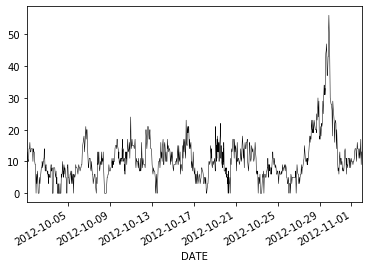

In [3]:
df_processed.loc['72503014732 : LA GUARDIA AIRPORT, NY US', 'HourlyWindSpeed'].plot(color='k', lw=.5)

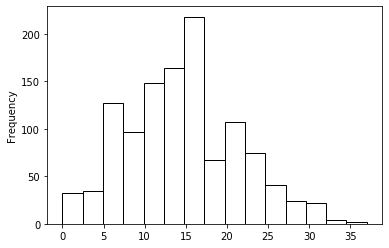

In [4]:
df_processed.loc['70219026615 : BETHEL AIRPORT, AK US', 'HourlyWindSpeed'].plot(
    kind='hist', facecolor='None', edgecolor='k', lw=1, bins=15
)

The `ncei_api` is the most direct way of interfacing with the NOAA NCEI API. Its drawback is that it allows for extraction of data for only a relatively small window (depends on data source, not clearly documented by NOAA - largest window apeears to be ~10 years). Serious applications require many years of data. That's where the `ncei_api_batch` function becomes much more convenient.

# Batch Data Extraction
Let's get 2 years of wind data for the [La Guardia](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00014732/detail) station (it should be noted that station ID is not WBAN, but a USAF number - it can be found in pdf printouts for the station or via the NCEI Search API as shown further in this notebook):

In [5]:
wind = ncei_api_batch(
        dataset='local-climatological-data', stations='72503014732',
        start_date='2010-01-01', end_date='2011-01-01', time_delta='1Y',
    datatypes=['HourlyWindSpeed', 'HourlyWindDirection']
    )
wind

REPORT_TYPE  \
STATION                                 DATE                              
72503014732 : LA GUARDIA AIRPORT, NY US 2010-01-01 00:51:00       FM-15   
                                        2010-01-01 01:00:00       FM-12   
                                        2010-01-01 01:04:00       FM-16   
                                        2010-01-01 01:37:00       FM-16   
                                        2010-01-01 01:47:00       FM-16   
...                                                                 ...   
                                        2011-01-01 01:51:00       FM-15   
                                        2011-01-01 02:51:00       FM-15   
                                        2011-01-01 03:51:00       FM-15   
                                        2011-01-01 04:00:00       FM-12   
                                        2011-01-01 04:51:00       FM-15   

                                                            HourlyWindDirection  \
STATION                                 DATE                                      
72503014732 : LA GUARDIA AIRPORT, NY US 2010-01-01 00:51:00                 060   
                                        2010-01-01 01:00:00                 060   
                                        2010-01-01 01:04:00                 000   
                                        2010-01-01 01:37:00                 000   
                                        2010-01-01 01:47:00                 000   
...                                                                         ...   
                                        2011-01-01 01:51:00                 200   
                                        2011-01-01 02:51:00                 200   
                                        2011-01-01 03:51:00                 200   
                                        2011-01-01 04:00:00                 200   
                                        2011-01-01 04:51:00                 180   

                                                            LONGITUDE  \
STATION                                 DATE                            
72503014732 : LA GUARDIA AIRPORT, NY US 2010-01-01 00:51:00    -73.88   
                                        2010-01-01 01:00:00    -73.88   
                                        2010-01-01 01:04:00    -73.88   
                                        2010-01-01 01:37:00    -73.88   
                                        2010-01-01 01:47:00    -73.88   
...                                                               ...   
                                        2011-01-01 01:51:00    -73.88   
                                        2011-01-01 02:51:00    -73.88   
                                        2011-01-01 03:51:00    -73.88   
                                        2011-01-01 04:00:00    -73.88   
                                        2011-01-01 04:51:00    -73.88   

                                                            ELEVATION SOURCE  \
STATION                                 DATE                                   
72503014732 : LA GUARDIA AIRPORT, NY US 2010-01-01 00:51:00       3.4      7   
                                        2010-01-01 01:00:00       3.4      4   
                                        2010-01-01 01:04:00       3.4      7   
                                        2010-01-01 01:37:00       3.4      7   
                                        2010-01-01 01:47:00       3.4      7   
...                                                               ...    ...   
                                        2011-01-01 01:51:00       3.4      7   
                                        2011-01-01 02:51:00       3.4      7   
                                        2011-01-01 03:51:00       3.4      7   
                                        2011-01-01 04:00:00       3.4      4   
                                        2011-01-01 04:51:00       3.4      7   

             

This output is exactly the same one as for the `ncei_api` function, except that the DataFrame is much longer. Similar processing is required:

In [6]:
wind_processed = (
    wind
    .loc[:, ['HourlyWindSpeed', 'HourlyWindDirection']]
    .apply(pd.to_numeric, errors='coerce')
    .dropna(how='any')
)
wind_processed

HourlyWindSpeed  \
STATION                                 DATE                                   
72503014732 : LA GUARDIA AIRPORT, NY US 2010-01-01 00:51:00              3.0   
                                        2010-01-01 01:00:00              3.0   
                                        2010-01-01 01:04:00              0.0   
                                        2010-01-01 01:37:00              0.0   
                                        2010-01-01 01:47:00              0.0   
...                                                                      ...   
                                        2011-01-01 01:51:00              8.0   
                                        2011-01-01 02:51:00              6.0   
                                        2011-01-01 03:51:00              5.0   
                                        2011-01-01 04:00:00              5.0   
                                        2011-01-01 04:51:00              3.0   

                                                             HourlyWindDirection  
STATION                                 DATE                                      
72503014732 : LA GUARDIA AIRPORT, NY US 2010-01-01 00:51:00                 60.0  
                                        2010-01-01 01:00:00                 60.0  
                                        2010-01-01 01:04:00                  0.0  
                                        2010-01-01 01:37:00                  0.0  
                                        2010-01-01 01:47:00                  0.0  
...                                                                          ...  
                                        2011-01-01 01:51:00                200.0  
                                        2011-01-01 02:51:00                200.0  
                                        2011-01-01 03:51:00                200.0  
                                        2011-01-01 04:00:00                200.0  
                                        2011-01-01 04:51:00                180.0  

[12846 rows x 2 columns]

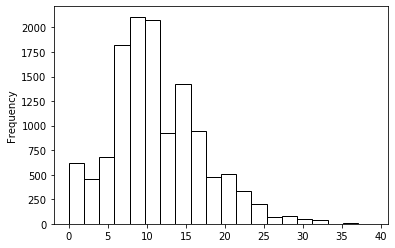

In [7]:
wind_processed.loc[:, 'HourlyWindSpeed'].plot(kind='hist', facecolor='None', edgecolor='k', lw=1, bins=20)

# Additional Functions
The `coastlib.data.noaa_ncei` module has additional functions `ncei_datasets` and `ncei_search`. These functions are useful when exploring what information is available for specific regions and what keywords should be used in the `ncei_api` and `ncei_api_batch` functions.

### NCEI Datasets
The `ncei_datasets` function should be used to retrieve available NOAA NCEI formats, datasets, and datatypes for given dates, geographical extents, and keywords. Unfortunately, these appear to not be working properly at this moment since the NCEI API is not fully developed and is not properly documented. One way to use it would be as follows:

In [8]:
datasets = ncei_datasets()
print('Formats:', datasets[0], end='\n\n')
print('Datasets (first 3):', datasets[1][:3], end='\n\n')
print('Datatypes:', datasets[2].keys())

Formats: ['csv', 'json', 'native', 'netcdf', 'pdf']

Datasets (first 3): ['avhrr-cloud-properties-patmosx', 'avhrr-reflectance-patmosx', 'daily-summaries']

Datatypes: dict_keys(['global-summary-of-the-month', 'global-summary-of-the-year', 'global-hourly', 'daily-summaries', 'global-marine', 'global-summary-of-the-day', 'mean-layer-temperature-uah', 'avhrr-reflectance-patmosx', 'local-climatological-data', 'normals-annualseasonal'])


### NCEI Search
The `ncei_search` function should be used to retrieve available NOAA NCEI formats, datasets, and datatypes for given parameters (station IDs, geographical extents, keywords, etc.). Unfortunately, as with the `ncei_datasets`, the NCEI Search API is not documented (current NOAA documentation is completely wrong - their description don't match examples, I had to manually play with different parameters to find out how it works). In addition to absense of any documentation, this API is also broken - certain options have no effect (such as geographical extent). It is unknown when/if NOAA will update it.

So far, the only meaningful way to use this is to get metadata for known stations:

In [9]:
ns_data = ncei_search(dataset='local-climatological-data', stations='72503014732', limit=5)
print('Datatypes (first 5):', ns_data[0][:5], end='\n\n')
print('Stations:', ns_data[1], end='\n\n')
print('Results:', ns_data[2]['72503014732'])

Datatypes (first 5): ['AWND', 'CDSD', 'CLDD', 'DSNW', 'DailyAverageDewPointTemperature']

Stations: ['72503014732']

Results: {'name': 'LA GUARDIA AIRPORT, NY US', 'datatypes': {'Short Duration Precipitation Value 150': 'ShortDurationPrecipitationValue150', 'REPORT_TYPE': 'REPORT_TYPE', 'Short Duration Precipitation Value 030': 'ShortDurationPrecipitationValue030', 'Monthly Sea Level Pressure': 'MonthlySeaLevelPressure', 'Monthly Max Sea Level Pressure Value Date': 'MonthlyMaxSeaLevelPressureValueDate', 'Hourly Sea Level Pressure': 'HourlySeaLevelPressure', 'Daily Maximum Dry Bulb Temperature': 'DailyMaximumDryBulbTemperature', 'Monthly Days With Temperature  > 32 Degrees': 'MonthlyDaysWithGT32Temp', 'Monthly Days With Temperature  < 32 Degrees': 'MonthlyDaysWithLT32Temp', 'Monthly Max Sea Level Pressure Value Time': 'MonthlyMaxSeaLevelPressureValueTime', 'Monthly Greatest Precip Date': 'MonthlyGreatestPrecipDate', 'Hourly Precipitation': 'HourlyPrecipitation', 'Daily Peak Wind Speed':

# Final Remarks
This tutorial doesn't cover all functionality and ways of using the `noaa_ncei` module. Please refer to the [module source code](https://github.com/georgebv/coastlib/blob/master/coastlib/data/noaa_ncei.py) and the API reference for more information on arguments not covered here.